<a href="https://colab.research.google.com/github/kjeyaram-orcl/DataScience/blob/main/ML_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('/content/column_2C_weka.csv')
df2 = pd.read_csv('/content/column_3C_weka.csv')

In [ ]:
df1.info()
print(df1['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
class
Abnormal    210
Normal      100
Name: count, dtype: int64


In [ ]:
df2.info()
print(df2['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64


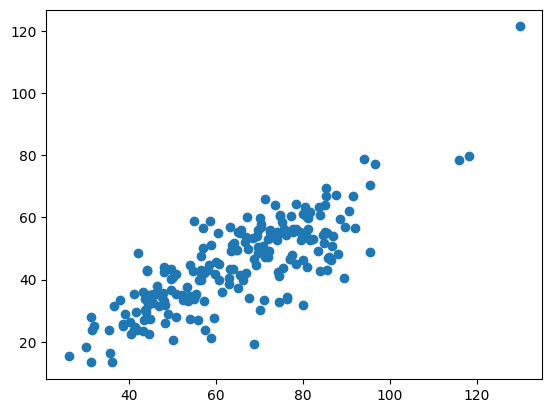

In [ ]:
import numpy as np

data = df1[df1['class']=='Abnormal']
#x=np.array(data['pelvic_incidence']).reshape(-1,1)
#y=np.array(data['sacral_slope']).reshape(-1,1)
x=np.array(data.iloc[:,0]).reshape(-1,1)
y=np.array(data.iloc[:,3]).reshape(-1,1)
plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
res=linreg.fit(x,y)
print("Co-efficient" , res.coef_)
print("Intercept", res.intercept_)
print('R^2 score: ',res.score(x, y))

Co-efficient [[0.66047069]]
Intercept [2.17390961]
R^2 score:  0.6458410481075871


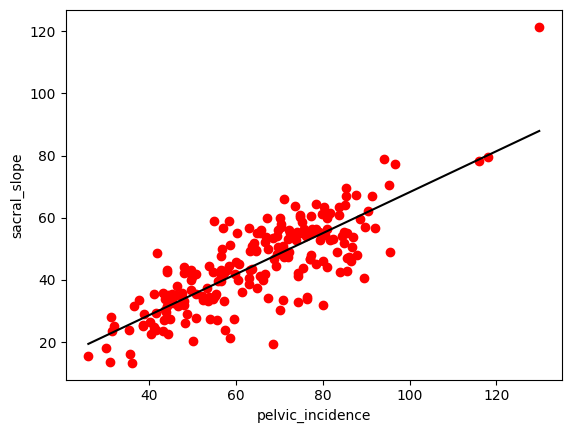

In [ ]:
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
predicated=linreg.predict(predict_space)
plt.scatter(x,y,color='red')
plt.plot(predict_space,predicated,color='black')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [ ]:
#Cross Validatiion
from sklearn.model_selection import cross_val_score
k=5
cv_result = cross_val_score(linreg,x,y,cv=k) # uses R^2 as score
#print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV scores average:  0.3931462502884869


Co-efficient [[0.66223279]]
Intercept [2.13334651]
R^2 score:  0.6458107370664816


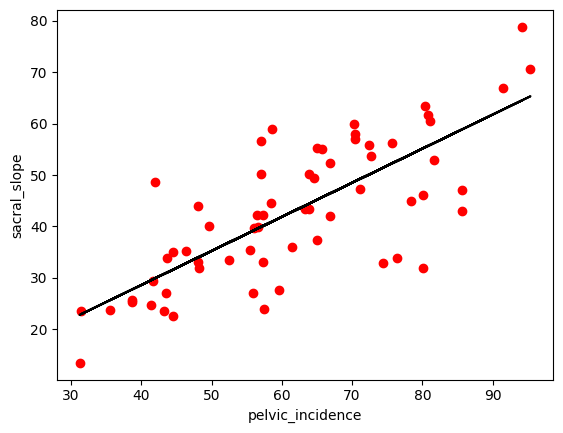

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

linreg=LinearRegression()
res1=linreg.fit(x_train,y_train)
print("Co-efficient" , res1.coef_)
print("Intercept", res1.intercept_)
print('R^2 score: ',res1.score(x, y))

y_predict=linreg.predict(x_test)
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_predict,color="black")
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Ridge score:  0.5636411149900469


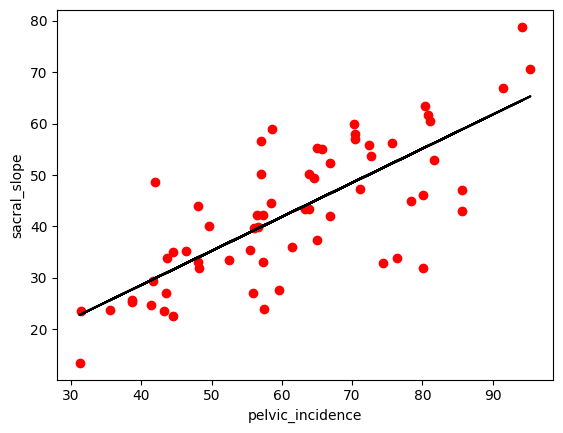

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, ridge_predict,color="black")
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Lasso score:  0.5636457795386378
Lasso coefficients:  [0.66193086]


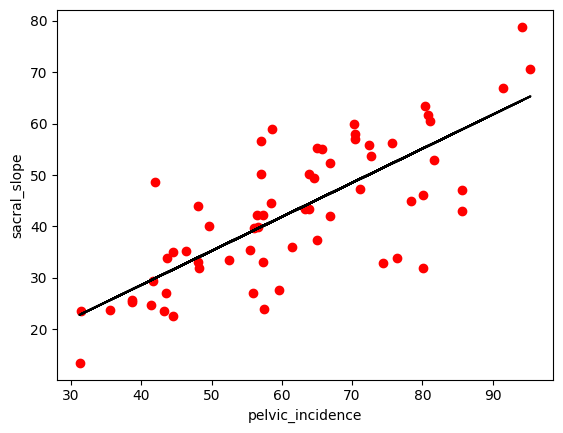

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, lasso_predict,color="black")
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

#Unsupervised  - Clustering:K_Means Algorithm

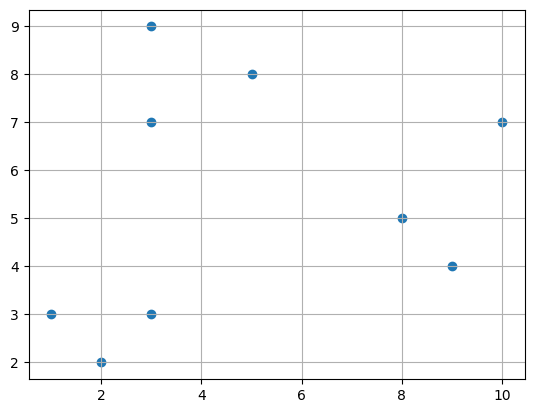

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

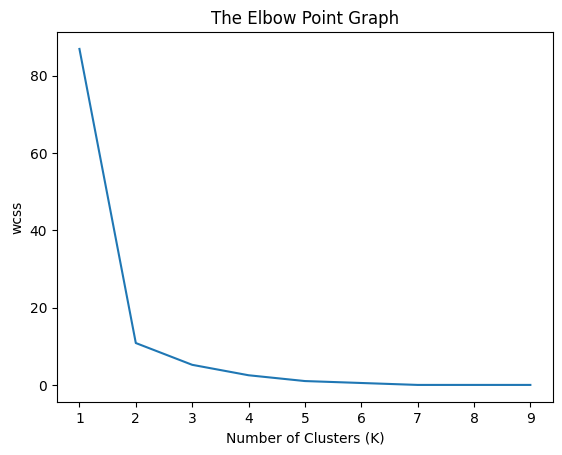

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X=np.array([1,2,5,8,3,10,3,9,3]).reshape(-1,1)
Y=np.array([3,2,8,5,9,7,3,4,7]).reshape(-1,1)
#plt.figure(figsize=(15,8))
plt.scatter(X,Y)
plt.grid()
plt.show()

wcss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
#plt.figure(figsize=(15,8))
plt.plot(range(1,10), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

print(kmeans.cluster_centers_)

[[9.        ]
 [2.83333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

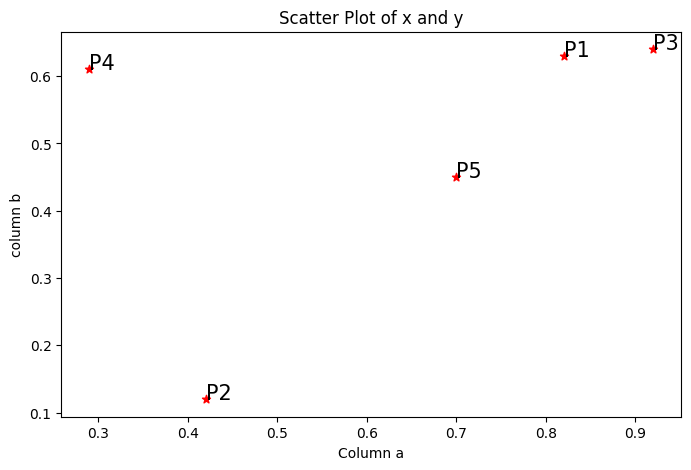

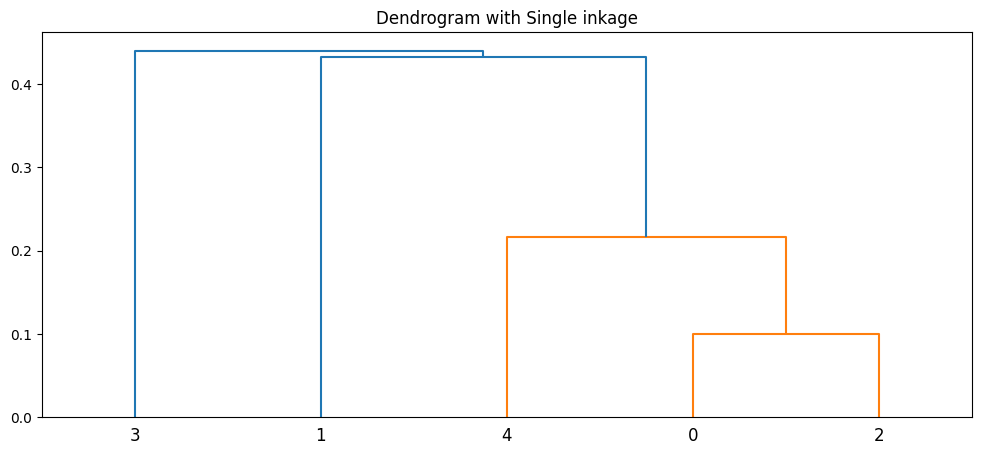

In [26]:
a = np.random.random_sample(size = 5)
b = np.random.random_sample(size = 5)
point = ['P1','P2','P3','P4','P5']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('Column a')
plt.ylabel('column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
  plt.annotate(j.Index, (j.a, j.b), fontsize=15)
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist
plt.figure(figsize=(12,5))
plt.title("Dendrogram with Single inkage")
dend = shc.dendrogram(shc.linkage(data[['a', 'b']], method='single'))

In [7]:
point1 = np.array((0.07, 0.83))
point2 = np.array((0.85, 0.14))

# finding sum of squares
sum_sq = np.sum(np.square(point1 - point2))

# Doing squareroot and
# printing Euclidean distance
print(np.sqrt(sum_sq))

1.0413932974625868
